In [1]:
from statistics import mean
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from IPython import display
%matplotlib inline

In [2]:
chart = pd.read_csv('./gemini_ETHUSD_2020_1min.csv', skiprows=[0])  # Read file with chart
chart = chart.sort_values(by=['Date']) # Since it is in a reverse order, sort the chart ascendingly
chart = chart.reset_index(drop=True)   # Reset old index
chart.head(10)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1577836800000,2020-01-01 00:00:00,ETHUSD,128.84,128.84,128.74,128.74,0.010000
1,1577836860000,2020-01-01 00:01:00,ETHUSD,128.74,128.74,128.74,128.74,0.000000
2,1577836920000,2020-01-01 00:02:00,ETHUSD,128.74,128.74,128.74,128.74,0.000000
3,1577836980000,2020-01-01 00:03:00,ETHUSD,128.74,128.74,128.74,128.74,0.000000
4,1577837040000,2020-01-01 00:04:00,ETHUSD,128.74,128.74,128.49,128.50,4.039458
5,1577837100000,2020-01-01 00:05:00,ETHUSD,128.50,128.50,128.50,128.50,0.000000
6,1577837160000,2020-01-01 00:06:00,ETHUSD,128.50,128.50,128.50,128.50,0.000000
7,1577837220000,2020-01-01 00:07:00,ETHUSD,128.50,128.50,128.41,128.41,1.627411
8,1577837280000,2020-01-01 00:08:00,ETHUSD,128.41,128.41,128.41,128.41,0.000000
9,1577837340000,2020-01-01 00:09:00,ETHUSD,128.41,128.41,128.41,128.41,0.000000


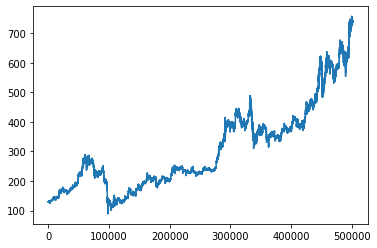

In [3]:
plt.plot(chart['Open'])

In [4]:
def generateFeatureMatrix(chart):
    
    date = []
    price = []
    last_1 = []
    last_2 = []
    last_4 = []
    last_8 = []
    last_16 = []
    last_32 = []
    last_64 = []
    last_128 = []
    last_256 = []
    last_512 = []
    last_1024 = []
    last_2048 = []
    last_4096 = []
    last_8192 = []
    last_16348 = []
    last_32768 = []
    last_65536 = []
    last_131072 = []
    last_262144 = []
    last_524288 = []
    next_1 = []
    next_2 = []
    next_4 = []
    next_8 = []
    next_16 = []
    next_32 = []
    next_64 = []
    next_128 = []
    next_256 = []
    next_512 = []
    next_1024 = []
    next_2048 = []
    next_4096 = []
    next_8192 = []
    next_16348 = []
    next_32768 = []
    next_65536 = []
    next_131072 = []
    next_262144 = []
    next_524288 = []
    
    i = 0

    rows = chart.shape[0]
    print("Rows:", rows)
    
    i = 0
    while i < rows:
        if(i % 10000 == 0): print(i)
        date.append(chart.iloc[i, 1])
        current_price = chart.iloc[i, 3]
        price.append(current_price)
        
        value = np.nan
        if i > 0:
            value = current_price / chart.iloc[i - 1, 3]
        last_1.append(value)

        value = np.nan
        if i > 1:
            value = current_price / chart.iloc[i - 2, 3]
        last_2.append(value)

        value = np.nan
        if i > 3:
            value = current_price / chart.iloc[i - 4, 3]
        last_4.append(value)

        value = np.nan
        if i > 7:
            value = current_price / chart.iloc[i - 8, 3]
        last_8.append(value)
        
        value = np.nan
        if i > 15:
            value = current_price / chart.iloc[i - 16, 3]
        last_16.append(value)
        
        value = np.nan
        if i > 31:
            value = current_price / chart.iloc[i - 32, 3]
        last_32.append(value)
        
        value = np.nan
        if i > 63:
            value = current_price / chart.iloc[i - 64, 3]
        last_64.append(value)
        
        value = np.nan
        if i > 127:
            value = current_price / chart.iloc[i - 128, 3]
        last_128.append(value)
        
        value = np.nan
        if i > 255:
            value = current_price / chart.iloc[i - 256, 3]
        last_256.append(value)
        
        value = np.nan
        if i > 511:
            value = current_price / chart.iloc[i - 512, 3]
        last_512.append(value)
        
        value = np.nan
        if i > 1023:
            value = current_price / chart.iloc[i - 1024, 3]
        last_1024.append(value)
        
        value = np.nan
        if i > 2047:
            value = current_price / chart.iloc[i - 2048, 3]
        last_2048.append(value)
        
        value = np.nan
        if i > 4095:
            value = current_price / chart.iloc[i - 4096, 3]
        last_4096.append(value)
        
        value = np.nan
        if i > 8191:
            value = current_price / chart.iloc[i - 8192, 3]
        last_8192.append(value)
        
        value = np.nan
        if i > 16347:
            value = current_price / chart.iloc[i - 16348, 3]
        last_16348.append(value)
        
        value = np.nan
        if i > 32767:
            value = current_price / chart.iloc[i - 32768, 3]
        last_32768.append(value)

        value = np.nan
        if i > 65535:
            value = current_price / chart.iloc[i - 65536, 3]
        last_65536.append(value)

        value = np.nan
        if i > 131071:
            value = current_price / chart.iloc[i - 131072, 3]
        last_131072.append(value)

        value = np.nan
        if i > 262143:
            value = current_price / chart.iloc[i - 262144, 3]
        last_262144.append(value)

        value = np.nan
        if i > 524287:
            value = current_price / chart.iloc[i - 524288, 3]
        last_524288.append(value)

        value = np.nan
        if i < (rows - 1):
            value = chart.iloc[i + 1, 3] / current_price
        next_1.append(value)        
        
        value = np.nan
        if i < (rows - 2):
            value = chart.iloc[i + 2, 3] / current_price
        next_2.append(value)        
        
        value = np.nan
        if i < (rows - 4):
            value = chart.iloc[i + 4, 3] / current_price
        next_4.append(value)        
        
        value = np.nan
        if i < (rows - 8):
            value = chart.iloc[i + 8, 3] / current_price
        next_8.append(value)        
        
        value = np.nan
        if i < (rows - 16):
            value = chart.iloc[i + 16, 3] / current_price
        next_16.append(value)        
        
        value = np.nan
        if i < (rows - 32):
            value = chart.iloc[i + 32, 3] / current_price
        next_32.append(value)        
        
        value = np.nan
        if i < (rows - 64):
            value = chart.iloc[i + 64, 3] / current_price
        next_64.append(value)        
        
        value = np.nan
        if i < (rows - 128):
            value = chart.iloc[i + 128, 3] / current_price
        next_128.append(value)        
        
        value = np.nan
        if i < (rows - 256):
            value = chart.iloc[i + 256, 3] / current_price
        next_256.append(value)        
        
        value = np.nan
        if i < (rows - 512):
            value = chart.iloc[i + 512, 3] / current_price
        next_512.append(value)        
        
        value = np.nan
        if i < (rows - 1024):
            value = chart.iloc[i + 1024, 3] / current_price
        next_1024.append(value)        
        
        value = np.nan
        if i < (rows - 2048):
            value = chart.iloc[i + 2048, 3] / current_price
        next_2048.append(value)        
        
        value = np.nan
        if i < (rows - 4096):
            value = chart.iloc[i + 4096, 3] / current_price
        next_4096.append(value)        
        
        value = np.nan
        if i < (rows - 8192):
            value = chart.iloc[i + 8192, 3] / current_price
        next_8192.append(value)        
        
        value = np.nan
        if i < (rows - 16348):
            value = chart.iloc[i + 16348, 3] / current_price
        next_16348.append(value)        
        
        value = np.nan
        if i < (rows - 32768):
            value = chart.iloc[i + 32768, 3] / current_price
        next_32768.append(value)        
        
        value = np.nan
        if i < (rows - 65536):
            value = chart.iloc[i + 65536, 3] / current_price
        next_65536.append(value)        
        
        value = np.nan
        if i < (rows - 131072):
            value = chart.iloc[i + 131072, 3] / current_price
        next_131072.append(value)        
        
        value = np.nan
        if i < (rows - 262144):
            value = chart.iloc[i + 262144, 3] / current_price
        next_262144.append(value)        
        
        value = np.nan
        if i < (rows - 524288):
            value = chart.iloc[i + 524288, 3] / current_price
        next_524288.append(value)        
        
        i+=1   
        
#    feature_matrix = pd.DataFrame(list(zip(date, last_524288, last_262144, last_131072, last_65536, last_32768, last_16348, last_8192, last_4096, last_2048, last_1024, last_512, last_256, last_128, last_64, last_32, last_16, last_8, last_4, last_2, last_1, price, next_1, next_2, next_4, next_8, next_16, next_32, next_64, next_128, next_256, next_512, next_1024, next_2048, next_4096, next_8192, next_16348, next_32768, next_65536, next_131072, next_262144, next_524288)), columns =['Date', 'Last 524288', 'Last 262144', 'Last 131072', 'Last 65536', 'Last 32768', 'Last 16348', 'Last 8192', 'Last 4096', 'Last 2048', 'Last 1024', 'Last 512', 'Last 256', 'Last 128', 'Last 64', 'Last 32', 'Last 16', 'Last 8', 'Last 4', 'Last 2', 'Last 1', 'Price', 'Next 1', 'Next 2', 'Next 4', 'Next 8', 'Next 16', 'Next 32', 'Next 64', 'Next 128', 'Next 256', 'Next 512', 'Next 1024', 'Next 2048', 'Next 4096', 'Next 8192', 'Next 16348', 'Next 32768', 'Next 65536', 'Next 131072', 'Next 262144', 'Next 524288'])            
    feature_matrix = pd.DataFrame(list(zip(date, last_131072, last_65536, last_32768, last_16348, last_8192, last_4096, last_2048, last_1024, last_512, last_256, last_128, last_64, last_32, last_16, last_8, last_4, last_2, last_1, price, next_1, next_2, next_4, next_8, next_16, next_32, next_64, next_128, next_256, next_512, next_1024, next_2048, next_4096, next_8192, next_16348, next_32768, next_65536, next_131072, next_262144, next_524288)), columns =['Date', 'Last 131072', 'Last 65536', 'Last 32768', 'Last 16348', 'Last 8192', 'Last 4096', 'Last 2048', 'Last 1024', 'Last 512', 'Last 256', 'Last 128', 'Last 64', 'Last 32', 'Last 16', 'Last 8', 'Last 4', 'Last 2', 'Last 1', 'Price', 'Next 1', 'Next 2', 'Next 4', 'Next 8', 'Next 16', 'Next 32', 'Next 64', 'Next 128', 'Next 256', 'Next 512', 'Next 1024', 'Next 2048', 'Next 4096', 'Next 8192', 'Next 16348', 'Next 32768', 'Next 65536', 'Next 131072', 'Next 262144', 'Next 524288'])            

    return feature_matrix

In [5]:
feature_matrix = generateFeatureMatrix(chart)

Rows: 501133
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000


In [6]:
feature_matrix

,Date,Last 131072,Last 65536,Last 32768,Last 16348,Last 8192,Last 4096,Last 2048,Last 1024,Last 512,...,Next 1024,Next 2048,Next 4096,Next 8192,Next 16348,Next 32768,Next 65536,Next 131072,Next 262144,Next 524288
0,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.028563,1.005123,1.039894,1.092130,1.112232,1.241850,2.066982,1.119295,1.859438,NaN
1,2020-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.026332,1.004971,1.040702,1.092978,1.113096,1.242815,2.068588,1.119776,1.860882,NaN
2,2020-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.026332,1.004971,1.039537,1.093056,1.113096,1.242815,2.069365,1.119776,1.860882,NaN
3,2020-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.026332,1.004971,1.037595,1.092745,1.113096,1.242815,2.069365,1.120475,1.860882,NaN
4,2020-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.026332,1.004971,1.034643,1.092745,1.113096,1.242815,2.069365,1.118689,1.862358,NaN
5,2020-01-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.028171,1.006848,1.036576,1.094786,1.115175,1.242724,2.069027,1.124358,1.865837,NaN
6,2020-01-01 00:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.028171,1.006848,1.036576,1.094786,1.115175,1.242724,2.069027,1.119144,1.866226,NaN
7,2020-01-01 00:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030350,1.006848,1.036576,1.094786,1.115175,1.242724,2.068872,1.119144,1.866226,NaN
8,2020-01-01 00:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.031072,1.007554,1.037380,1.095475,1.115957,1.243595,2.064637,1.119383,1.868235,NaN
9,2020-01-01 00:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.032396,1.007554,1.037380,1.093139,1.115957,1.243595,2.064637,1.119695,1.868235,NaN


In [7]:
feature_matrix_reduced=feature_matrix
feature_matrix_reduced=feature_matrix_reduced.dropna(subset=['Last 131072'], axis=0) # Remove rows with empty fields
feature_matrix_reduced=feature_matrix_reduced.dropna(subset=['Next 512'], axis=0) # Remove rows with empty fields
feature_matrix_reduced = feature_matrix_reduced[['Last 131072', 'Last 65536', 'Last 32768', 'Last 16348', 'Last 8192', 'Last 4096', 'Last 2048', 'Last 1024', 'Last 512', 'Last 256', 'Last 128', 'Last 64', 'Last 32', 'Last 16', 'Last 8', 'Last 4', 'Last 2', 'Last 1', 'Price', 'Next 512']]
feature_matrix_reduced.head(10)

,Last 131072,Last 65536,Last 32768,Last 16348,Last 8192,Last 4096,Last 2048,Last 1024,Last 512,Last 256,Last 128,Last 64,Last 32,Last 16,Last 8,Last 4,Last 2,Last 1,Price,Next 512
131072,1.119295,0.541512,1.222015,1.056329,1.091921,1.017785,1.015993,1.008744,1.001111,1.007546,1.006983,1.007898,1.007757,1.006350,1.004738,1.001945,0.999515,0.997993,144.21,1.041537
131073,1.119776,0.541324,1.214081,1.058288,1.091542,1.017289,1.016500,1.008394,1.000764,1.007196,1.006634,1.007548,1.007830,1.006985,1.002364,1.001598,0.997647,0.999653,144.16,1.041898
131074,1.119776,0.541121,1.214081,1.060702,1.091542,1.018079,1.016500,1.008394,1.000764,1.007196,1.006634,1.007548,1.007830,1.006985,1.001459,0.999168,0.999653,1.000000,144.16,1.041898
131075,1.120475,0.541459,1.207922,1.062459,1.092224,1.018787,1.017134,1.009024,1.001388,1.008107,1.007262,1.009377,1.008459,1.007614,1.002014,0.998270,1.000624,1.000624,144.25,1.041248
131076,1.118689,0.540595,1.209337,1.064056,1.090482,1.017162,1.015513,1.007415,0.999792,1.007556,1.005656,1.007767,1.006851,1.004534,1.000625,0.998682,0.999029,0.998406,144.02,1.042911
131077,1.124358,0.543423,1.213302,1.067455,1.093965,1.022433,1.018756,1.010632,1.002985,1.010774,1.008868,1.011198,1.010067,1.007742,1.003821,1.002220,1.001594,1.003194,144.48,1.039590
131078,1.119144,0.540903,1.206865,1.063447,1.088892,1.017692,1.014032,1.005946,0.998334,1.006086,1.004190,1.006509,1.006579,1.003069,0.996742,0.997572,0.998542,0.995363,143.81,1.049788
131079,1.119144,0.540944,1.203632,1.065259,1.088892,1.017188,1.014032,1.005946,0.998334,1.006086,1.004190,1.006509,1.006579,1.001951,0.995225,0.996950,0.995363,1.000000,143.81,1.055838
131080,1.119383,0.542170,1.190098,1.064741,1.088362,1.016693,1.013538,1.006019,1.003631,1.007147,1.003701,1.006019,1.006089,1.001463,0.996741,0.998056,0.999513,0.999513,143.74,1.056004
131081,1.119695,0.542320,1.188068,1.065669,1.088665,1.016976,1.012464,1.007710,1.003910,1.007427,1.003980,1.006299,1.006369,0.999722,0.997364,0.995155,0.999791,1.000278,143.78,1.057379


In [8]:
train_dataset = feature_matrix_reduced.sample(frac=0.8, random_state=42)
test_dataset = feature_matrix_reduced.drop(train_dataset.index)

In [9]:
train_labels = train_dataset.pop('Next 512')
test_labels = test_dataset.pop('Next 512')

In [10]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Last 131072,295639.0,1.469623,0.348092,0.694139,1.175719,1.513223,1.711633,2.590199
Last 65536,295639.0,1.284486,0.321042,0.521487,1.048073,1.292831,1.556707,2.373425
Last 32768,295639.0,1.165544,0.199938,0.719678,1.022726,1.132029,1.290732,1.794176
Last 16348,295639.0,1.079195,0.125183,0.740235,0.988418,1.070538,1.151907,1.692558
Last 8192,295639.0,1.040985,0.097502,0.678636,0.973993,1.028022,1.105335,1.365406
Last 4096,295639.0,1.020696,0.070980,0.700111,0.977978,1.012118,1.060095,1.304411
Last 2048,295639.0,1.010237,0.047641,0.781661,0.984273,1.005785,1.034632,1.227870
Last 1024,295639.0,1.005112,0.033421,0.789224,0.988324,1.003540,1.022866,1.183116
Last 512,295639.0,1.002529,0.023375,0.844187,0.991890,1.001767,1.013558,1.150609
Last 256,295639.0,1.001269,0.016847,0.857284,0.993860,1.000851,1.008452,1.133799


In [11]:
test_dataset.head(10)

,Last 131072,Last 65536,Last 32768,Last 16348,Last 8192,Last 4096,Last 2048,Last 1024,Last 512,Last 256,Last 128,Last 64,Last 32,Last 16,Last 8,Last 4,Last 2,Last 1,Price
131077,1.124358,0.543423,1.213302,1.067455,1.093965,1.022433,1.018756,1.010632,1.002985,1.010774,1.008868,1.011198,1.010067,1.007742,1.003821,1.002220,1.001594,1.003194,144.48
131085,1.124385,0.542966,1.192250,1.058201,1.091902,1.018532,1.014013,1.008898,1.005446,1.009464,1.005868,1.007839,1.003764,1.000486,0.996678,1.001530,1.000000,1.000000,144.00
131087,1.120972,0.541679,1.200700,1.059993,1.091902,1.018532,1.014013,1.008898,1.005446,1.009464,1.005446,1.007839,1.004885,0.996540,1.001321,1.000000,1.000000,1.000000,144.00
131090,1.127254,0.543862,1.194194,1.058811,1.094859,1.021290,1.016759,1.010710,1.008592,1.014260,1.009367,1.011418,1.008592,1.001595,1.003126,1.002708,0.998893,0.998893,144.39
131091,1.127254,0.543862,1.194194,1.058811,1.094859,1.021290,1.016759,1.010710,1.008592,1.016258,1.009862,1.011418,1.008592,1.000971,1.002708,1.002708,0.998893,1.000000,144.39
131097,1.126946,0.544753,1.190414,1.067222,1.094241,1.022673,1.022384,1.015714,1.011103,1.016998,1.011881,1.012234,1.006745,1.007025,1.001660,1.002631,1.001106,1.000000,144.79
131099,1.126245,0.543209,1.187428,1.065224,1.093644,1.022037,1.021748,1.015082,1.010475,1.016509,1.011252,1.011605,1.005140,1.004861,1.002147,1.000484,0.999378,1.000000,144.70
131104,1.128021,0.543501,1.181061,1.064450,1.091183,1.023486,1.021607,1.014942,1.009208,1.018873,1.010617,1.011041,1.003259,1.000899,0.999240,0.999862,1.000207,1.000207,144.68
131108,1.129201,0.546037,1.158560,1.059865,1.092569,1.021946,1.019716,1.014075,1.010184,1.019859,1.010255,1.012444,1.005555,1.003673,1.000829,1.000968,1.000000,1.000000,144.82
131109,1.128461,0.545509,1.158459,1.059228,1.090772,1.020958,1.018730,1.013094,1.009208,1.018873,1.010547,1.011465,1.001384,1.001870,1.000207,0.999378,0.999033,0.999033,144.68


In [12]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [13]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [14]:
model = build_model()

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1280      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


In [16]:
example_batch = normed_train_data[:10]
#example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.05063574],
       [ 0.32237568],
       [ 0.04333046],
       [ 0.08767794],
       [-0.11201478],
       [ 0.16541308],
       [ 0.03097293],
       [-0.14041823],
       [-0.00385494],
       [ 0.18176493]], dtype=float32)

In [17]:
example_batch

,Last 131072,Last 65536,Last 32768,Last 16348,Last 8192,Last 4096,Last 2048,Last 1024,Last 512,Last 256,Last 128,Last 64,Last 32,Last 16,Last 8,Last 4,Last 2,Last 1,Price
289987,0.987214,0.699245,1.429832,3.440856,1.049785,1.226533,1.104321,0.986599,1.360441,0.532130,0.188824,0.338975,0.139742,0.417884,0.065169,0.133592,0.335264,-0.004994,0.034058
280300,0.367144,-0.328993,0.506374,0.830441,1.672887,2.055148,0.842998,0.298879,0.154866,0.521334,0.493964,1.164653,1.082212,1.401006,1.085442,1.337574,0.948907,1.329635,-0.475170
359678,-0.022771,-1.291078,-1.513207,-0.758014,-0.944661,-1.800749,-2.410272,-2.820312,-2.361650,-0.643993,0.779962,-0.495426,-0.297655,-0.030375,-0.340559,-0.835690,0.266216,-0.004994,-0.082037
389566,0.264334,-0.856731,-0.793050,0.099199,0.897294,0.168309,0.421010,-0.457577,0.067003,0.155282,0.262256,0.074040,0.061224,0.346107,-0.240087,-0.293141,-0.247887,-0.342255,0.232454
373655,0.009140,-1.509397,-0.957523,-1.524886,-0.842782,-1.017200,-1.438338,-0.970636,-1.812011,-1.039697,-0.487666,-0.173295,0.877114,0.074385,-0.968883,-0.245069,-0.572503,-0.747855,-0.101267
387117,0.284623,-1.070013,-0.986623,-0.189977,0.195185,0.625782,-0.116266,-0.022866,-0.315203,-0.129212,-0.327900,-0.470341,-0.745354,-0.661352,0.086077,-0.064619,-0.239291,0.190283,0.155464
197034,-2.122100,0.292140,-0.876027,0.029389,-0.689656,0.204251,-0.390528,-0.673396,-0.592285,-0.083972,0.724798,0.917067,2.296307,1.172026,-0.055581,-0.192418,-0.006464,-0.004994,-1.050482
208170,-1.022905,1.007841,0.082740,1.013238,2.111067,0.635642,0.961136,1.556579,0.627992,0.594491,-0.078853,-0.530049,0.407130,0.326601,-0.180211,-0.661036,-0.813073,-0.004994,-0.723075
296302,1.212744,1.422050,2.343004,2.560169,1.617713,0.492335,-0.078868,0.625249,0.485199,-0.360559,0.292024,-0.010886,0.159204,0.468864,-0.293839,-0.474838,-0.429979,-0.413113,0.323293
313669,2.182244,2.041427,1.440576,0.253026,1.375537,-0.321379,0.346060,1.007402,1.144292,0.984959,-0.658850,-0.100138,0.857606,1.212527,-0.108301,0.656726,-0.006464,0.013510,0.618268


In [18]:
class PrintDots(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDots()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [19]:
hist=pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head(10)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,0.003619,0.029276,0.003619,0.000346,0.013934,0.000346,0
1,0.000330,0.013784,0.000330,0.000258,0.012144,0.000258,1
2,0.000254,0.012181,0.000254,0.000197,0.010581,0.000197,2
3,0.000222,0.011388,0.000222,0.000265,0.012970,0.000265,3
4,0.000199,0.010763,0.000199,0.000148,0.009063,0.000148,4
5,0.000184,0.010314,0.000184,0.000327,0.015091,0.000327,5
6,0.000172,0.009966,0.000172,0.000167,0.009838,0.000167,6
7,0.000161,0.009650,0.000161,0.000172,0.010268,0.000172,7
8,0.000152,0.009340,0.000152,0.000178,0.010307,0.000178,8
9,0.000143,0.009061,0.000143,0.000119,0.008113,0.000119,9


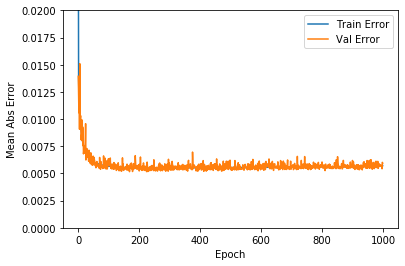

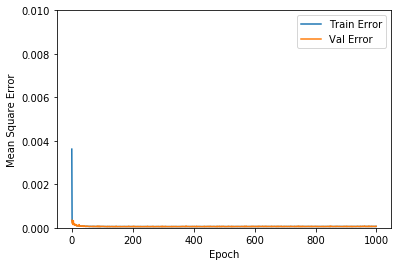

In [28]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
            label='Val Error')
    plt.legend()
    plt.ylim([0,0.02])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
            label='Val Error')
    plt.legend()
    plt.ylim([0,0.01])
    
plot_history(history)

In [20]:
# Consider only amenity variables
#X = feature_matrix_reduced[['Last 131072', 'Last 65536', 'Last 32768', 'Last 16348', 'Last 8192', 'Last 4096', 'Last 2048', 'Last 1024', 'Last 512', 'Last 256', 'Last 128', 'Last 64', 'Last 32', 'Last 16', 'Last 8', 'Last 4', 'Last 2', 'Last 1', 'Price']]
#y = feature_matrix_reduced['Next 512']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Instantiate
#lm_model = LinearRegression(normalize=True) 

#Fit
#lm_model.fit(X_train, y_train) 

#Predict
#y_test_preds = lm_model.predict(X_test)

# Rsquared here for comparing test and preds from model
#r2_test =  r2_score(y_test, y_test_preds)

# Print r2 to see result on test data
#print('The R^2 value is:', r2_test)